In [70]:
import numpy as np
import open3d as o3d

# Read .ply file
input_file = "bunny.pcd"
pcd = o3d.io.read_point_cloud(input_file) # Read the point cloud

# Visualize the point cloud within open3d
#o3d.visualization.draw_geometries([pcd]) 

# Convert open3d format to numpy array
# Here, you have the point cloud in numpy format. 
pcd = np.asarray(pcd.points).T*20
print(pcd.shape)



(3, 397)


In [76]:
def draw_axes(axis,R,t):
    x_line = np.array([t,t+R @ np.array([[1,0,0]]).T]).squeeze().T
    
    y_line = np.array([t,t+R @ np.array([[0,1,0]]).T]).squeeze().T
    z_line = np.array([t,t+R @ np.array([[0,0,1]]).T]).squeeze().T
    # print(x_line)
    # print(y_line)
    # print(z_line)
    # thing = np.vstack((x_line,y_line,z_line))
    # axis.plot(thing[0],np.vstack((x_line,y_line,z_line))[1])
    axis.plot(x_line[0],x_line[1],x_line[2],'r')
    
    axis.plot(y_line[0],y_line[1],y_line[2],'g')
   
    axis.plot(z_line[0],z_line[1],z_line[2],'b')

#draw_axes(None,np.eye(3),np.array([[1,2,3]]).T)

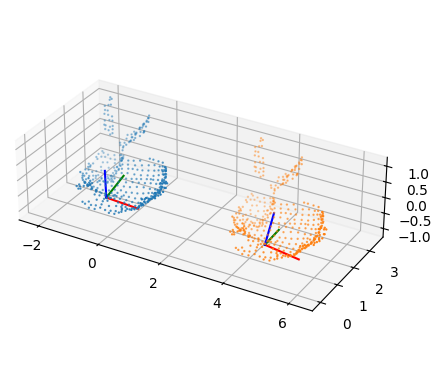

In [86]:
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation
#from mpl_toolkits import Axes3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

R1 = Rotation.from_rotvec([0.2,0.1,0.05]).as_matrix()
t1 = np.array([[0,0,0]]).T

R2 = Rotation.from_rotvec([-0.1,0.2,0.1]).as_matrix()
t2 = np.array([[5,0,0]]).T

pcd1 = R2 @ pcd +t1
pcd2 = R2 @ pcd +t2

c = np.linspace(0,1,len(pcd[0]))
ax.scatter(pcd1[0],pcd1[1],-pcd1[2],s=0.5)
draw_axes(ax,R1,t1)

ax.scatter(pcd2[0],pcd2[1],-pcd2[2],s=0.5)
draw_axes(ax,R2,t2)
ax.set_aspect('equal')
plt.show()